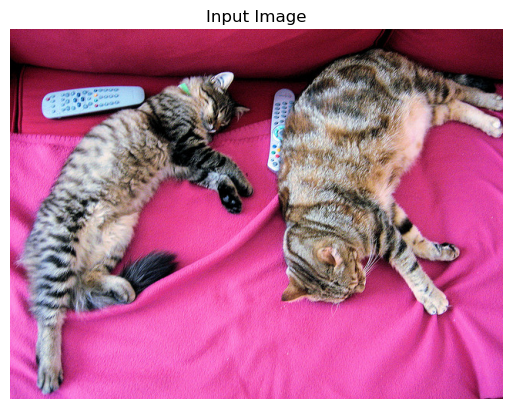

Predicted class: Egyptian cat


In [3]:
import torch
import matplotlib.pyplot as plt
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

# Load image from URL
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Plot the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title("Input Image")
plt.show()

# Load pre-trained ViT processor and model
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Run model prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]

# Print the prediction
print("Predicted class:", predicted_label)
